# Stack Overflow

## Introduction 

In the second part of this assignment, you will choose to create and analyze time series of creation dates of Stack Overflow questions, or Stack Overflow answers. You need to choose only one of the two, but please mention clearly what kind of time series you created. This assignment is to be completed **INDIVIDUALLY** and is due on **October 6 at 5pm**.

As stated above, you need to create time series of Stack Overflow questions, or answers using their creation dates. In order to do so you should use the information derived from Homework 1.1. Note that the focus of this homework is not on data collection, but on data analysis and interpretation so do not worry if you did not collect all data in the previous homework.

You are going to analyze users. If you selected to create time series of questions take the top 100 users with the most question posts, while if you created time series of answers take the top 100 users with the highest answer scores. For each user, your time series will be the number of questions (for questions), or the score value (for answers) posted by that user at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at a certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze users asking questions and sample during different hours of the day, your hypothesis could be that some users ask more questions during night hours because they are students, while others are more active during day time because they work in industry.   

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data (your hypothesis), what timeseries you created, what method you chose and why. Providing us with novel, or more than one hypotheses/analyses will give you extra credit. **(20 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

**Analysis on Time Series of Answer Posts from the Top 100 Users with the Highest Total Answer Scores**

In [14]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import time

# the following csv file was generated by the parsing in hw-1-1
df = pd.read_csv('HW-1-1.csv') # read the csv file as a pandas DataFrame and print it out

import collections
# create a dictionary to store OwnerUserID and scores
D = {}
# iterate over df to aggregate OwnerUserIds and add up total scores
for row in df.itertuples():
    key = row.OwnerUserId
    if key != 'None' and key not in D:
        D[key] = row.Score
    elif key != 'None':
        D[key] += row.Score
C = collections.Counter(D)
Top100 = C.most_common(100) # get the top 100 OwnerUserIds with the highest total scores

users = [x[0] for x in Top100] # get the OwnerUserIds of the top 100 users
A = [] # a list to store all entries of type answer
for row in df.itertuples():
    if row.Type == 'A' and row.OwnerUserId in users:
        A.append(list(row)[1:])
answers = pd.DataFrame(A, columns = ['Id', 'CreationDate', 'OwnerUserId', 'Tag', 'ViewCount', 'Score', 'Type'])

# divide each day into 12 2-hour blocks, and aggregate answer scores earned during each 2-hour block for each user
t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12 = [], [], [], [], [], [], [], [], [], [], [], []
for u in users:
    userAnswers = answers.loc[answers['OwnerUserId'] == u]
    c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for row in userAnswers.itertuples():
        hour = int(row.CreationDate[11:13])
        if hour > 0 and hour < 2:
            c1 += row.Score
        elif hour >= 2 and hour < 4:
            c2 += row.Score
        elif hour >= 4 and hour < 6:
            c3 += row.Score
        elif hour >= 6 and hour < 8:
            c4 += row.Score
        elif hour >= 8 and hour < 10:
            c5 += row.Score
        elif hour >= 10 and hour < 12:
            c6 += row.Score
        elif hour >= 12 and hour < 14:
            c7 += row.Score
        elif hour >= 14 and hour < 16:
            c8 += row.Score
        elif hour >= 16 and hour < 18:
            c9 += row.Score
        elif hour >= 18 and hour < 20:
            c10 += row.Score
        elif hour >= 20 and hour < 22:
            c11 += row.Score
        elif hour >= 22 and hour < 24:
            c12 += row.Score
    t1.append(c1)
    t2.append(c2)
    t3.append(c3)
    t4.append(c4)
    t5.append(c5)
    t6.append(c6)
    t7.append(c7)
    t8.append(c8)
    t9.append(c9)
    t10.append(c10)
    t11.append(c11)
    t12.append(c12)

mat = []
for i in range(100):
    l = []
    l.append(t1[i])
    l.append(t2[i])
    l.append(t3[i])
    l.append(t4[i])
    l.append(t5[i])
    l.append(t6[i])
    l.append(t7[i])
    l.append(t8[i])
    l.append(t9[i])
    l.append(t10[i])
    l.append(t11[i])
    l.append(t12[i])
    mat.append(l)

# now we have a matrix with one row for each of the top 100 users
# and columns as the answer scores they earned during each of the 2-hour blocks


Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

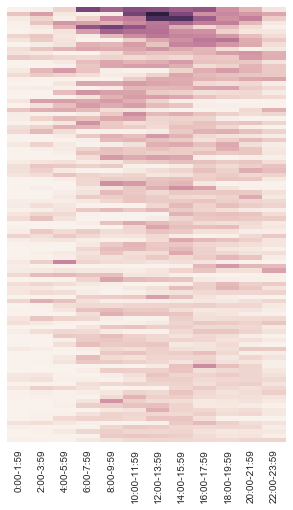

In [15]:
# plotting heatmap of data just to find patterns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 8))
timeBlocks = ['0:00-1:59', '2:00-3:59', '4:00-5:59', '6:00-7:59', '8:00-9:59', '10:00-11:59', '12:00-13:59', '14:00-15:59', '16:00-17:59', '18:00-19:59', '20:00-21:59', '22:00-23:59']
_ = sns.heatmap(mat, xticklabels=timeBlocks, yticklabels=False, linewidths=0, cbar=False)

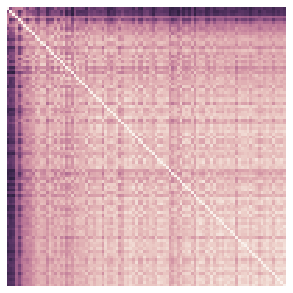

In [16]:
# plotting heatmap of the distance matrix just to find similarities
import sklearn.metrics as metrics
dist = metrics.euclidean_distances(mat)
plt.figure(figsize=(5, 8))
_ = sns.heatmap(dist, xticklabels=False, yticklabels=False, linewidths=0, square=True, cbar=False)

In [17]:
maximum = max([max(x) for x in dist])
minimum = min([min([i for i in x if i > 0]) for x in dist])
print maximum, minimum
# these are the maximum and minimum values in the Euclidean distance matrix

3263.87208695 148.445276112


In [18]:
import numpy as np
dist = np.asarray(dist)
print 'max: ', np.unravel_index(dist.argmax(), dist.shape)
for i in range(len(dist)):
    for j in range(len(dist[0])):
        if dist[i][j] == minimum:
            print 'min: ', (i, j)
# now we have the indices of one pair of users that are most different and another pair that are most similar

max:  (0, 67)
min:  (73, 83)
min:  (83, 73)


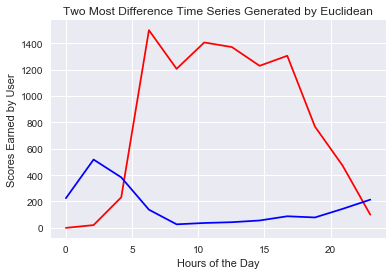

In [19]:
t = np.linspace(0,23,num=12)
a = mat[0]
b = mat[67]
# plot the two most different time series
plt.plot(t,a,'r') # plotting t,a separately 
plt.plot(t,b,'b') # plotting t,b separately 
plt.xlabel('Hours of the Day')
plt.ylabel('Scores Earned by User')
plt.title('Two Most Difference Time Series Generated by Euclidean')
plt.show()

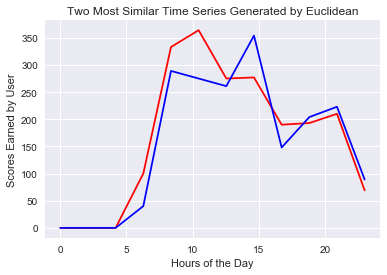

In [20]:
t = np.linspace(0,23,num=12)
a = mat[73]
b = mat[83]
# plot the two most similar time series
plt.plot(t,a,'r') # plotting t,a separately 
plt.plot(t,b,'b') # plotting t,b separately 
plt.xlabel('Hours of the Day')
plt.ylabel('Scores Earned by User')
plt.title('Two Most Similar Time Series Generated by Euclidean')
plt.show()

What are your interpretation/conclusions from the above plotting comparisons? **(5 pts)**

The two most different users answer questions during completely different times of the day. The red one mostly answers questions during the day, and the blue one mostly answers questions around midnight to early morning. My guess is that the red one probably works in the industry, while the blue one might be unemployed or self-employed.
The two most similar users answer questions during the same time periods of the day. They both start at around 9am and answer throughout the day, indicating that they might be working in the industry.

Choose a different distance/similarity metric and repeat the same time series analysis. **(5 pts)**

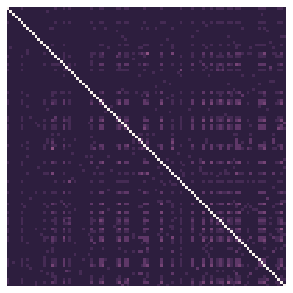

In [23]:
# plotting the heatmap of the distance matrix just to find similarities
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('hamming')
dist = dist.pairwise(mat)
plt.figure(figsize=(5, 8))
_ = sns.heatmap(dist, xticklabels=False, yticklabels=False, linewidths=0, square=True, cbar=False)

In [25]:
maximum = max([max(x) for x in dist])
minimum = min([min([i for i in x if i > 0]) for x in dist])
print maximum, minimum
# these are the maximum and minimum values in the Hamming distance matrix

1.0 0.666666666667


In [26]:
dist = np.asarray(dist)
print 'max: ', np.unravel_index(dist.argmax(), dist.shape)
for i in range(len(dist)):
    for j in range(len(dist[0])):
        if dist[i][j] == minimum:
            print 'min: ', (i, j)
# now we have the indices of one pair of users that are most different and two other pairs that
# tied in the most similar test

max:  (0, 1)
min:  (16, 50)
min:  (50, 16)
min:  (79, 98)
min:  (98, 79)


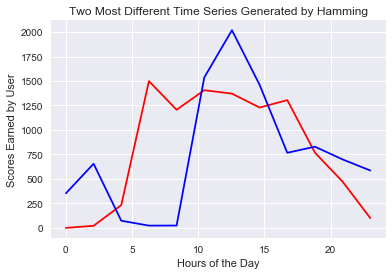

In [27]:
t = np.linspace(0,23,num=12)
a = mat[0]
b = mat[1]
# plot the two most different time series
plt.plot(t,a,'r') # plotting t,a separately 
plt.plot(t,b,'b') # plotting t,b separately 
plt.xlabel('Hours of the Day')
plt.ylabel('Scores Earned by User')
plt.title('Two Most Different Time Series Generated by Hamming')
plt.show()

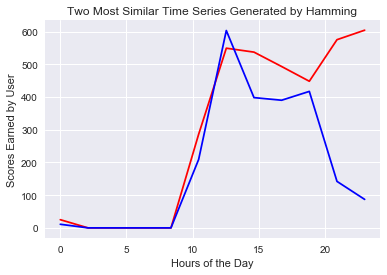

In [28]:
t = np.linspace(0,23,num=12)
a = mat[16]
b = mat[50]
# plot the two most similar time series
plt.plot(t,a,'r') # plotting t,a separately 
plt.plot(t,b,'b') # plotting t,b separately 
plt.xlabel('Hours of the Day')
plt.ylabel('Scores Earned by User')
plt.title('Two Most Similar Time Series Generated by Hamming')
plt.show()

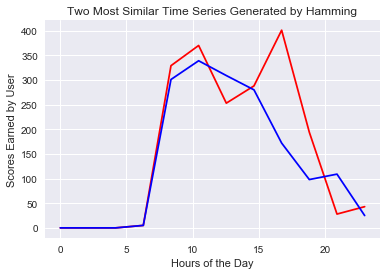

In [29]:
t = np.linspace(0,23,num=12)
a = mat[79]
b = mat[98]
# plot the two most similar time series
plt.plot(t,a,'r') # plotting t,a separately 
plt.plot(t,b,'b') # plotting t,b separately 
plt.xlabel('Hours of the Day')
plt.ylabel('Scores Earned by User')
plt.title('Two Most Similar Time Series Generated by Hamming')
plt.show()

Compare the two different metrics you used and report any observations. Why did you select the specific metrics? Which do you think performed better based on the results you were expecting and why? **(5 pts)**

I first used the Euclidean distance metrix because it is the most common one we use to find similarities between data points. I then used the Hamming distance metrix because it measures the edit distance between different data entries, which is another way to measure similarity.

Comparing the two distance metrics, I think that the Euclidean metrix focused more on the general trend of the graph, so the plots of the most similar users would move up and down together and the most different ones would have completely opposite trends. On the other hand, the Hamming metrix seems to focus more on overlapping data points. So the plots of the most different users would have the least intercepting points, while the most similar ones would overlap a lot, even if the general trend is not too similar for the two users.

My original hypothesis was that the users with the highest scores are probably professionals working in the industry, so they would have a lot of time to answer questions during the day. Looking at the first heatmap I generated, we can see that on the top and center the color is darker, indicating that my hypothesis was true, that the users with the highest total answer scores tend to answer questions during the day. Notice that the x axis is the two hour blocks of the day from 0:00am to 11:59pm left to right, and the y axis are the entries of the 100 users in descending order of their total answer scores from top to bottom. 

I think the Euclidean metrix preformed better, because the results I was expecting are about general trend in the graph, whether a user tends to answer more questions during the day or at night, and the Euclidean metrix does a good job at comparing series based on the trend. The Hamming metrix focuses on overlapping plots but that is not very useful when I am trying to find the general pattern.